In [1]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 2.8MB/s 
  Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


In [2]:
#Lendo dados
import pandas as pd

uri = "https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv"
filmes = pd.read_csv(uri)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Renomeando colunas
a_renomear = {
    'movieId': 'filme_id',
    'title': 'titulo',
    'genres': 'generos'
}

filmes = filmes.rename(columns=a_renomear)
filmes.tail()

,filme_id,titulo,generos
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [4]:
# Criando colunas para categorizar os generos dos filmes

generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#Escalando os dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [6]:
#Separando em grupos, generos que ṕossam se relacionar

from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print(f'Grupos {modelo.labels_}')

Grupos [0 0 2 ... 2 0 2]


In [7]:
#Correspondem aos generos de filme, onde temos 3 grupos
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.1888261   1.14156905  1.8540311   2.01876549  0.1255972
  -0.32407696 -0.19644305 -0.6031593   1.20699182 -0.09492563 -0.26133728
   0.50134331  0.29197797 -0.12738431 -0.27258764  0.22062636 -0.46254482
  -0.16599152 -0.08492502]
 [-0.05917995  0.44876427 -0.12233727 -0.23149977 -0.26718271 -0.56196241
   0.85146167 -0.21352287  0.0555834  -0.14600057  0.27281614  0.40738494
   0.02159051 -0.17710153  0.6165092  -0.31911446  0.14891275  1.45486977
  -0.11714275 -0.0717781 ]
 [ 0.03426107 -0.21160725 -0.16352028 -0.25266291 -0.26916501  0.19785438
  -0.27497648  0.12044803  0.08996074 -0.16633861 -0.08975732 -0.1118575
  -0.10145195  0.01555587 -0.21898812  0.17611834 -0.09950676 -0.48675406
   

In [8]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.188826,1.141569,1.854031,2.018765,0.125597,-0.324077,-0.196443,-0.603159,1.206992,-0.094926,-0.261337,0.501343,0.291978,-0.127384,-0.272588,0.220626,-0.462545,-0.165992,-0.084925
1,-0.059180,0.448764,-0.122337,-0.231500,-0.267183,-0.561962,0.851462,-0.213523,0.055583,-0.146001,0.272816,0.407385,0.021591,-0.177102,0.616509,-0.319114,0.148913,1.454870,-0.117143,-0.071778
2,0.034261,-0.211607,-0.163520,-0.252663,-0.269165,0.197854,-0.274976,0.120448,0.089961,-0.166339,-0.089757,-0.111858,-0.101452,0.015556,-0.218988,0.176118,-0.099507,-0.486754,0.076875,0.043992


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c55363710>,
      dtype=object)

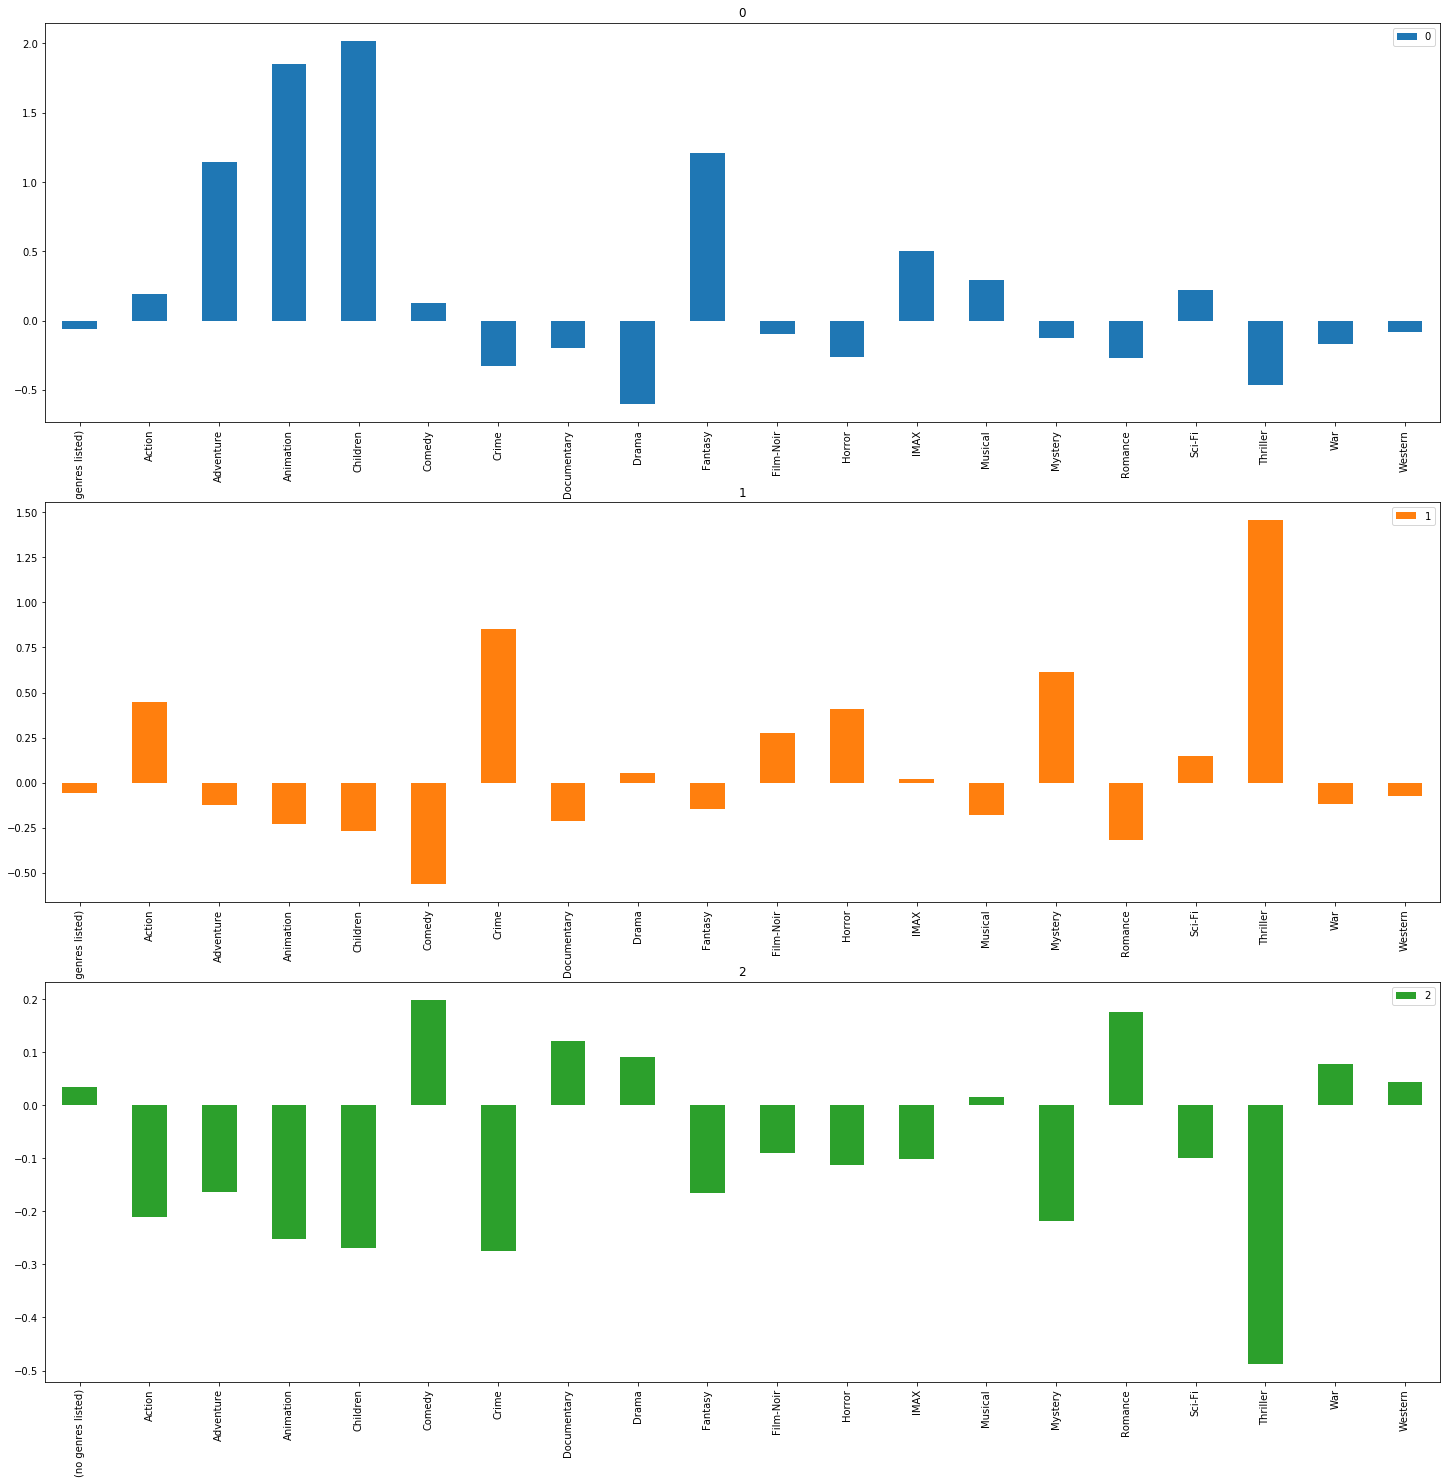

In [9]:
grupos.transpose().plot.bar(subplots=True, figsize = (25, 25), sharex = False)

In [10]:
grupo = 0
filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7237,73804,Asterix at the Olympic Games (Astérix aux jeux...,Adventure|Children|Comedy|Fantasy,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7601,86721,Idiots and Angels (2008),Animation|Drama|Fantasy,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
7748,91094,"Muppets, The (2011)",Children|Comedy|Musical,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
513,596,Pinocchio (1940),Animation|Children|Fantasy|Musical,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
7922,95473,Dragon Ball Z: The Return of Cooler (Doragon b...,Action|Adventure|Animation,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2803,3745,Titan A.E. (2000),Action|Adventure|Animation|Children|Sci-Fi,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5901,33615,Madagascar (2005),Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8333,107723,Highlander: The Search for Vengeance (2007),Action|Adventure|Fantasy,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9116,145491,Our Lips Are Sealed (2000),Children|Comedy|Drama,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7069,69644,Ice Age: Dawn of the Dinosaurs (2009),Action|Adventure|Animation|Children|Comedy|Rom...,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [11]:
#Biblioteca que ajuda na visualização
from sklearn.manifold import TSNE

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-12.381774 ,  55.93805  ],
       [ 59.43874  ,  16.479776 ],
       [-38.161636 ,   1.153906 ],
       ...,
       [-11.607916 ,   6.8955855],
       [-40.916286 , -23.00909  ],
       [ 25.010386 ,   7.3618727]], dtype=float32)

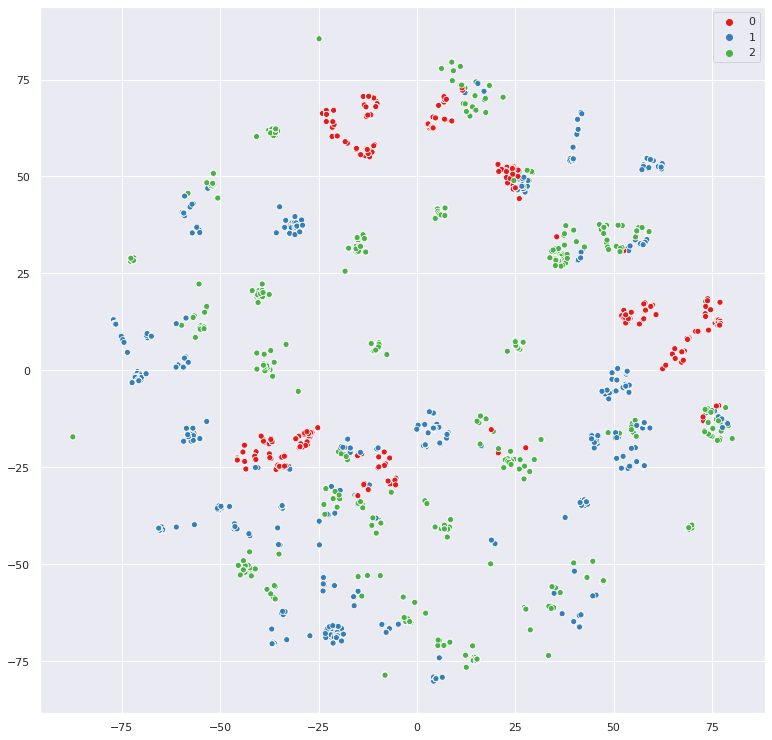

In [12]:
#Plotando dados gerados pelo tsne
import seaborn as sns

sns.set(rc={'figure.figsize':(13,13)})

sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=modelo.labels_, palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c4ee31ba8>,
      dtype=object)

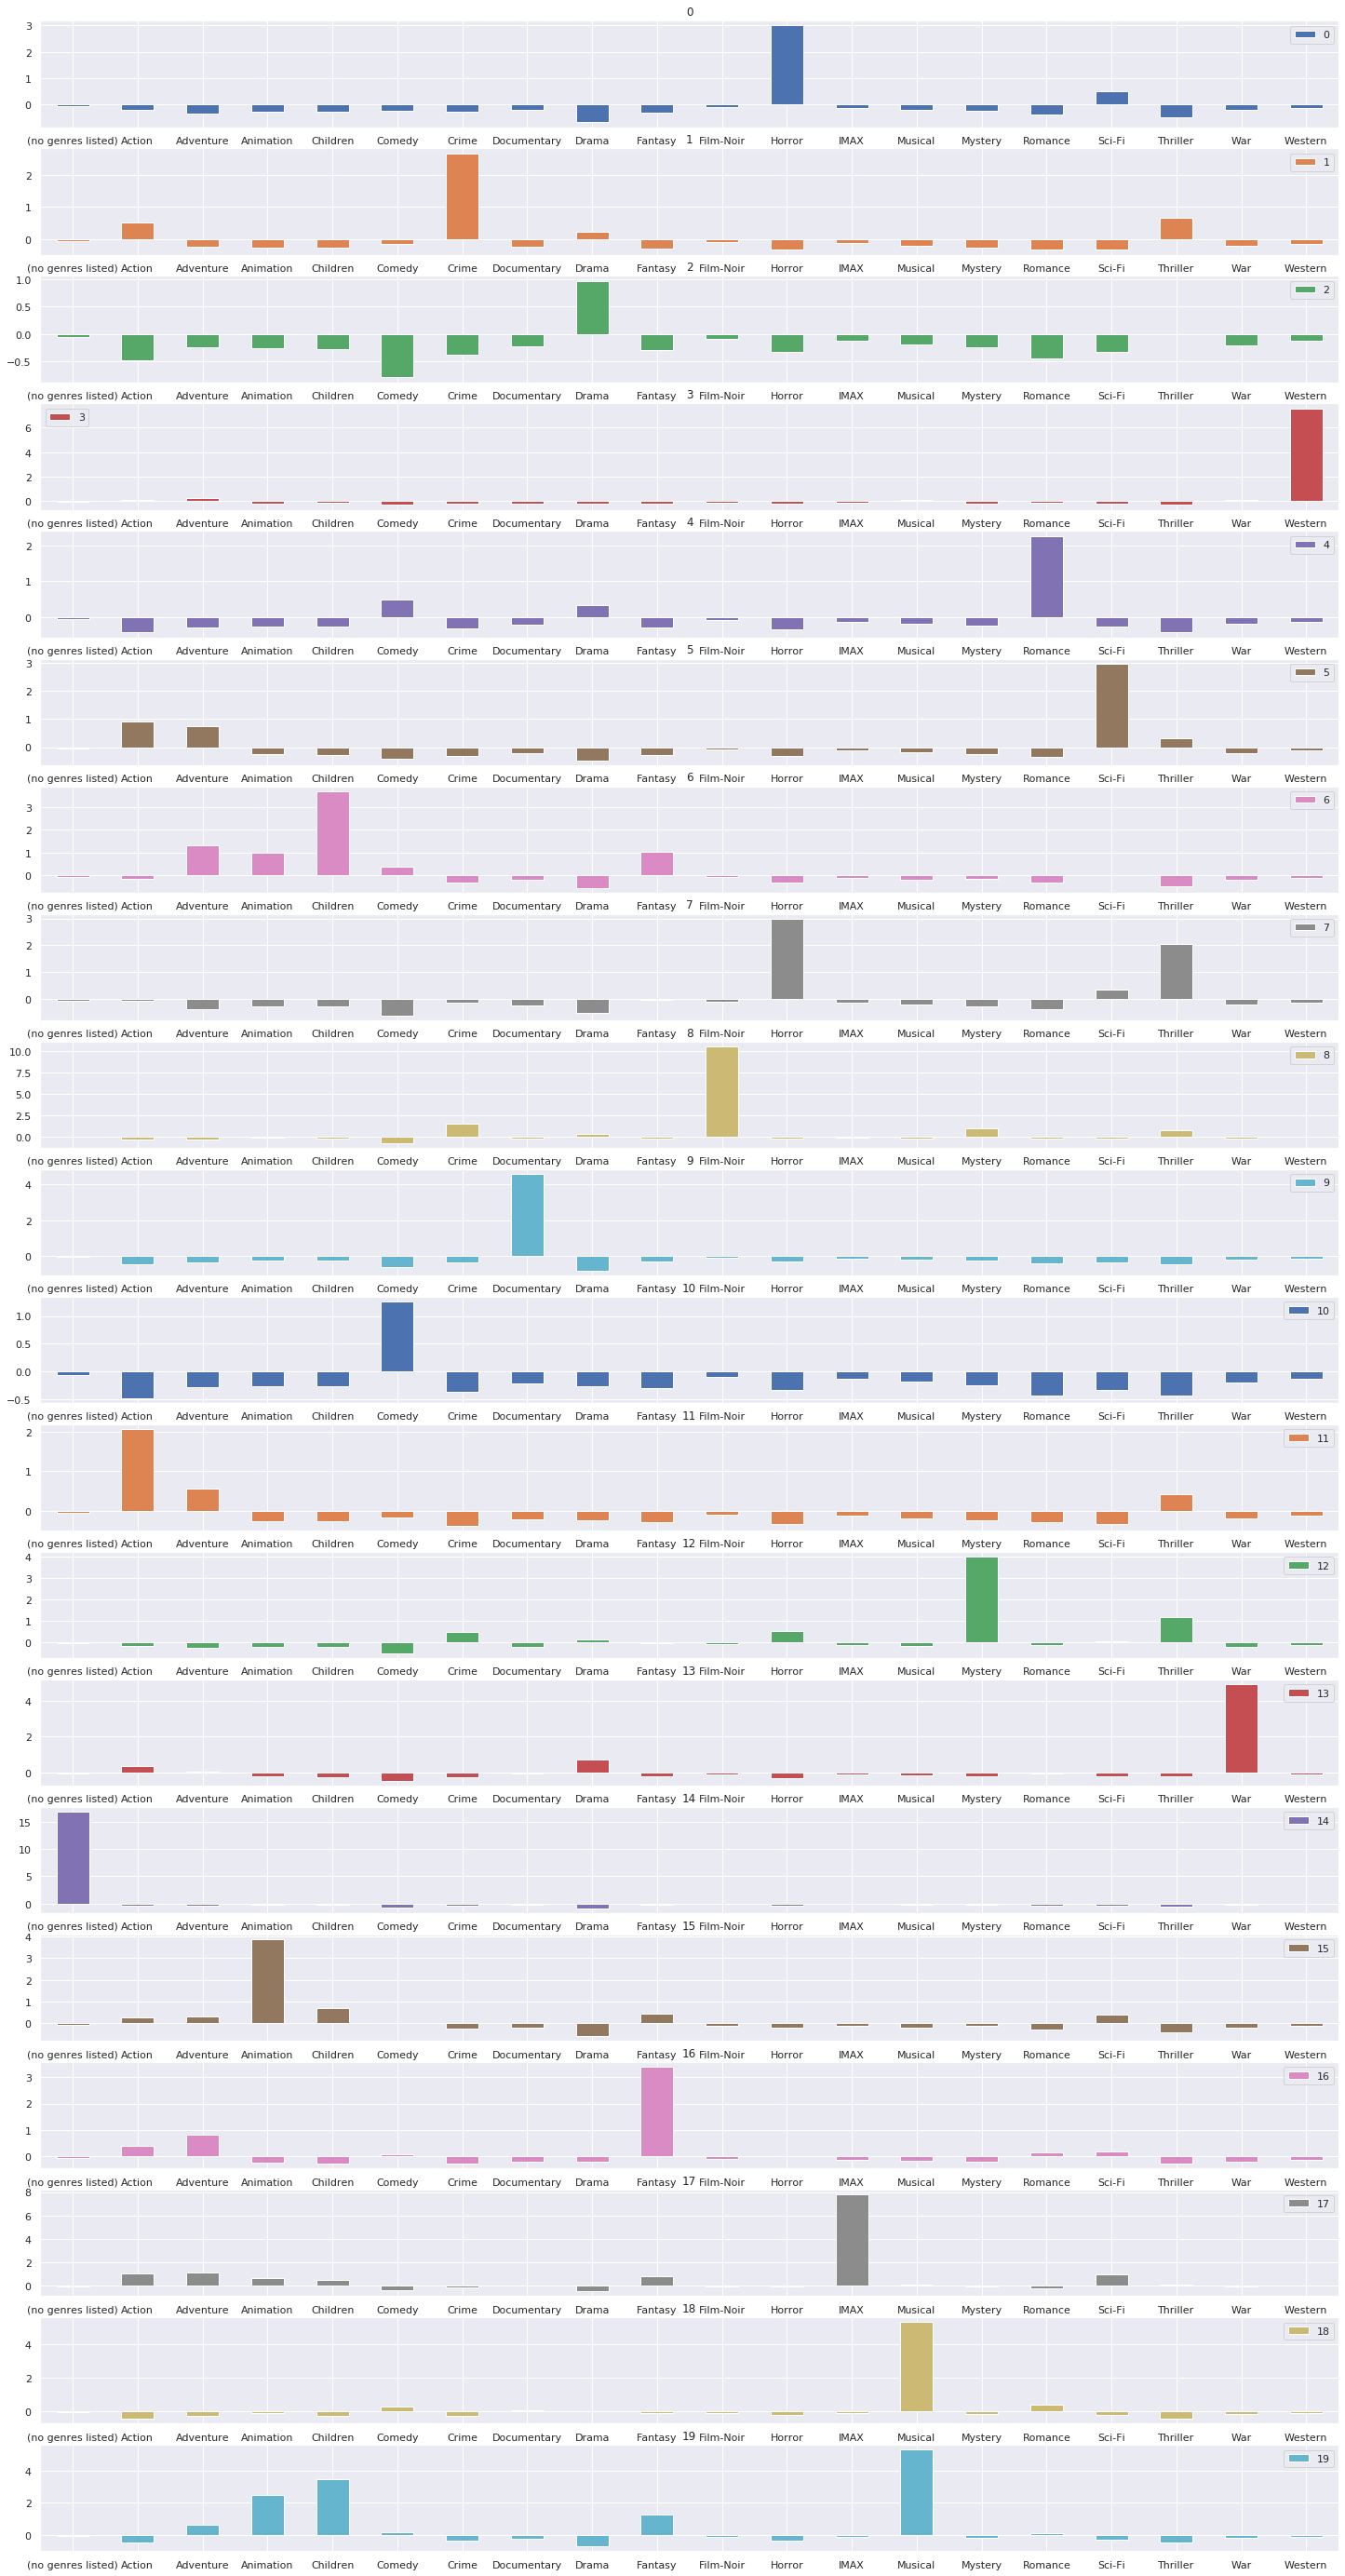

In [13]:
#Criando mais grupos

modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, 
             columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [14]:
#Filtrando amostras dentro dos filmes
grupo = 3
filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4080,5826,Rio Grande (1950),Romance|Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3452,4709,Paint Your Wagon (1969),Comedy|Musical|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
263,303,"Quick and the Dead, The (1995)",Action|Thriller|Western,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
982,1283,High Noon (1952),Drama|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1487,2012,Back to the Future Part III (1990),Adventure|Comedy|Sci-Fi|Western,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
6596,55363,Assassination of Jesse James by the Coward Rob...,Crime|Drama|Western,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3791,5300,3:10 to Yuma (1957),Action|Adventure|Drama|Thriller|Western,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
6122,43419,Bandidas (2006),Action|Comedy|Crime|Western,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
7358,78620,"Scalphunters, The (1968)",Comedy|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2733,3671,Blazing Saddles (1974),Comedy|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
#Função para calcular erro, distância entre os centróides
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [16]:
kmeans(20, generos_escalados)

[20, 54858.700853037626]

In [17]:
# Criando valores de erros a partir do numero de clusters
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range (1,41)]
resultado

[[1, 194840.0],
 [2, 179483.94029403635],
 [3, 168770.9539322654],
 [4, 156785.99625726676],
 [5, 146460.44136581136],
 [6, 137973.0333310144],
 [7, 129322.99107189989],
 [8, 119979.77818655022],
 [9, 109761.08099954326],
 [10, 102682.64257967279],
 [11, 94393.57194507238],
 [12, 85966.71814260617],
 [13, 80370.5375347161],
 [14, 74576.27898831261],
 [15, 66813.12131018189],
 [16, 64710.25383682813],
 [17, 61454.65719719165],
 [18, 58468.21170138573],
 [19, 56266.434579621],
 [20, 55468.10146669769],
 [21, 54642.465771989],
 [22, 52131.948739350606],
 [23, 50341.596384477685],
 [24, 49594.609000436336],
 [25, 48072.43156459264],
 [26, 46819.50012514959],
 [27, 45620.02703447467],
 [28, 44381.335573328084],
 [29, 43137.295531695665],
 [30, 43374.22811264331],
 [31, 41644.87920195433],
 [32, 40830.899952496824],
 [33, 40792.38114570532],
 [34, 39623.8195722327],
 [35, 39206.776334138485],
 [36, 37716.22810910337],
 [37, 37169.2418084189],
 [38, 36443.50768762014],
 [39, 35755.01365856798

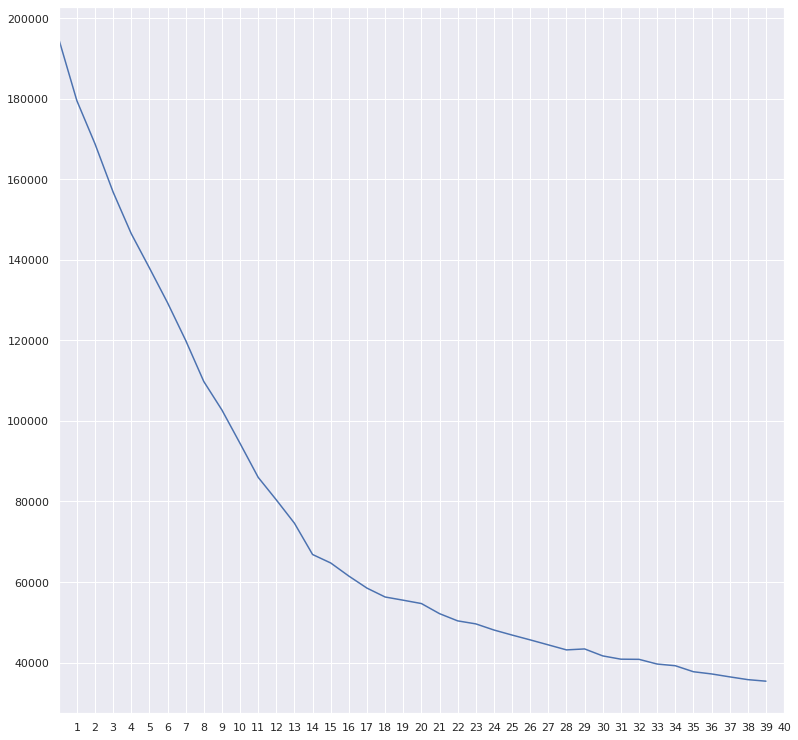

In [19]:
#Plotando
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c4d18c358>,
      dtype=object)

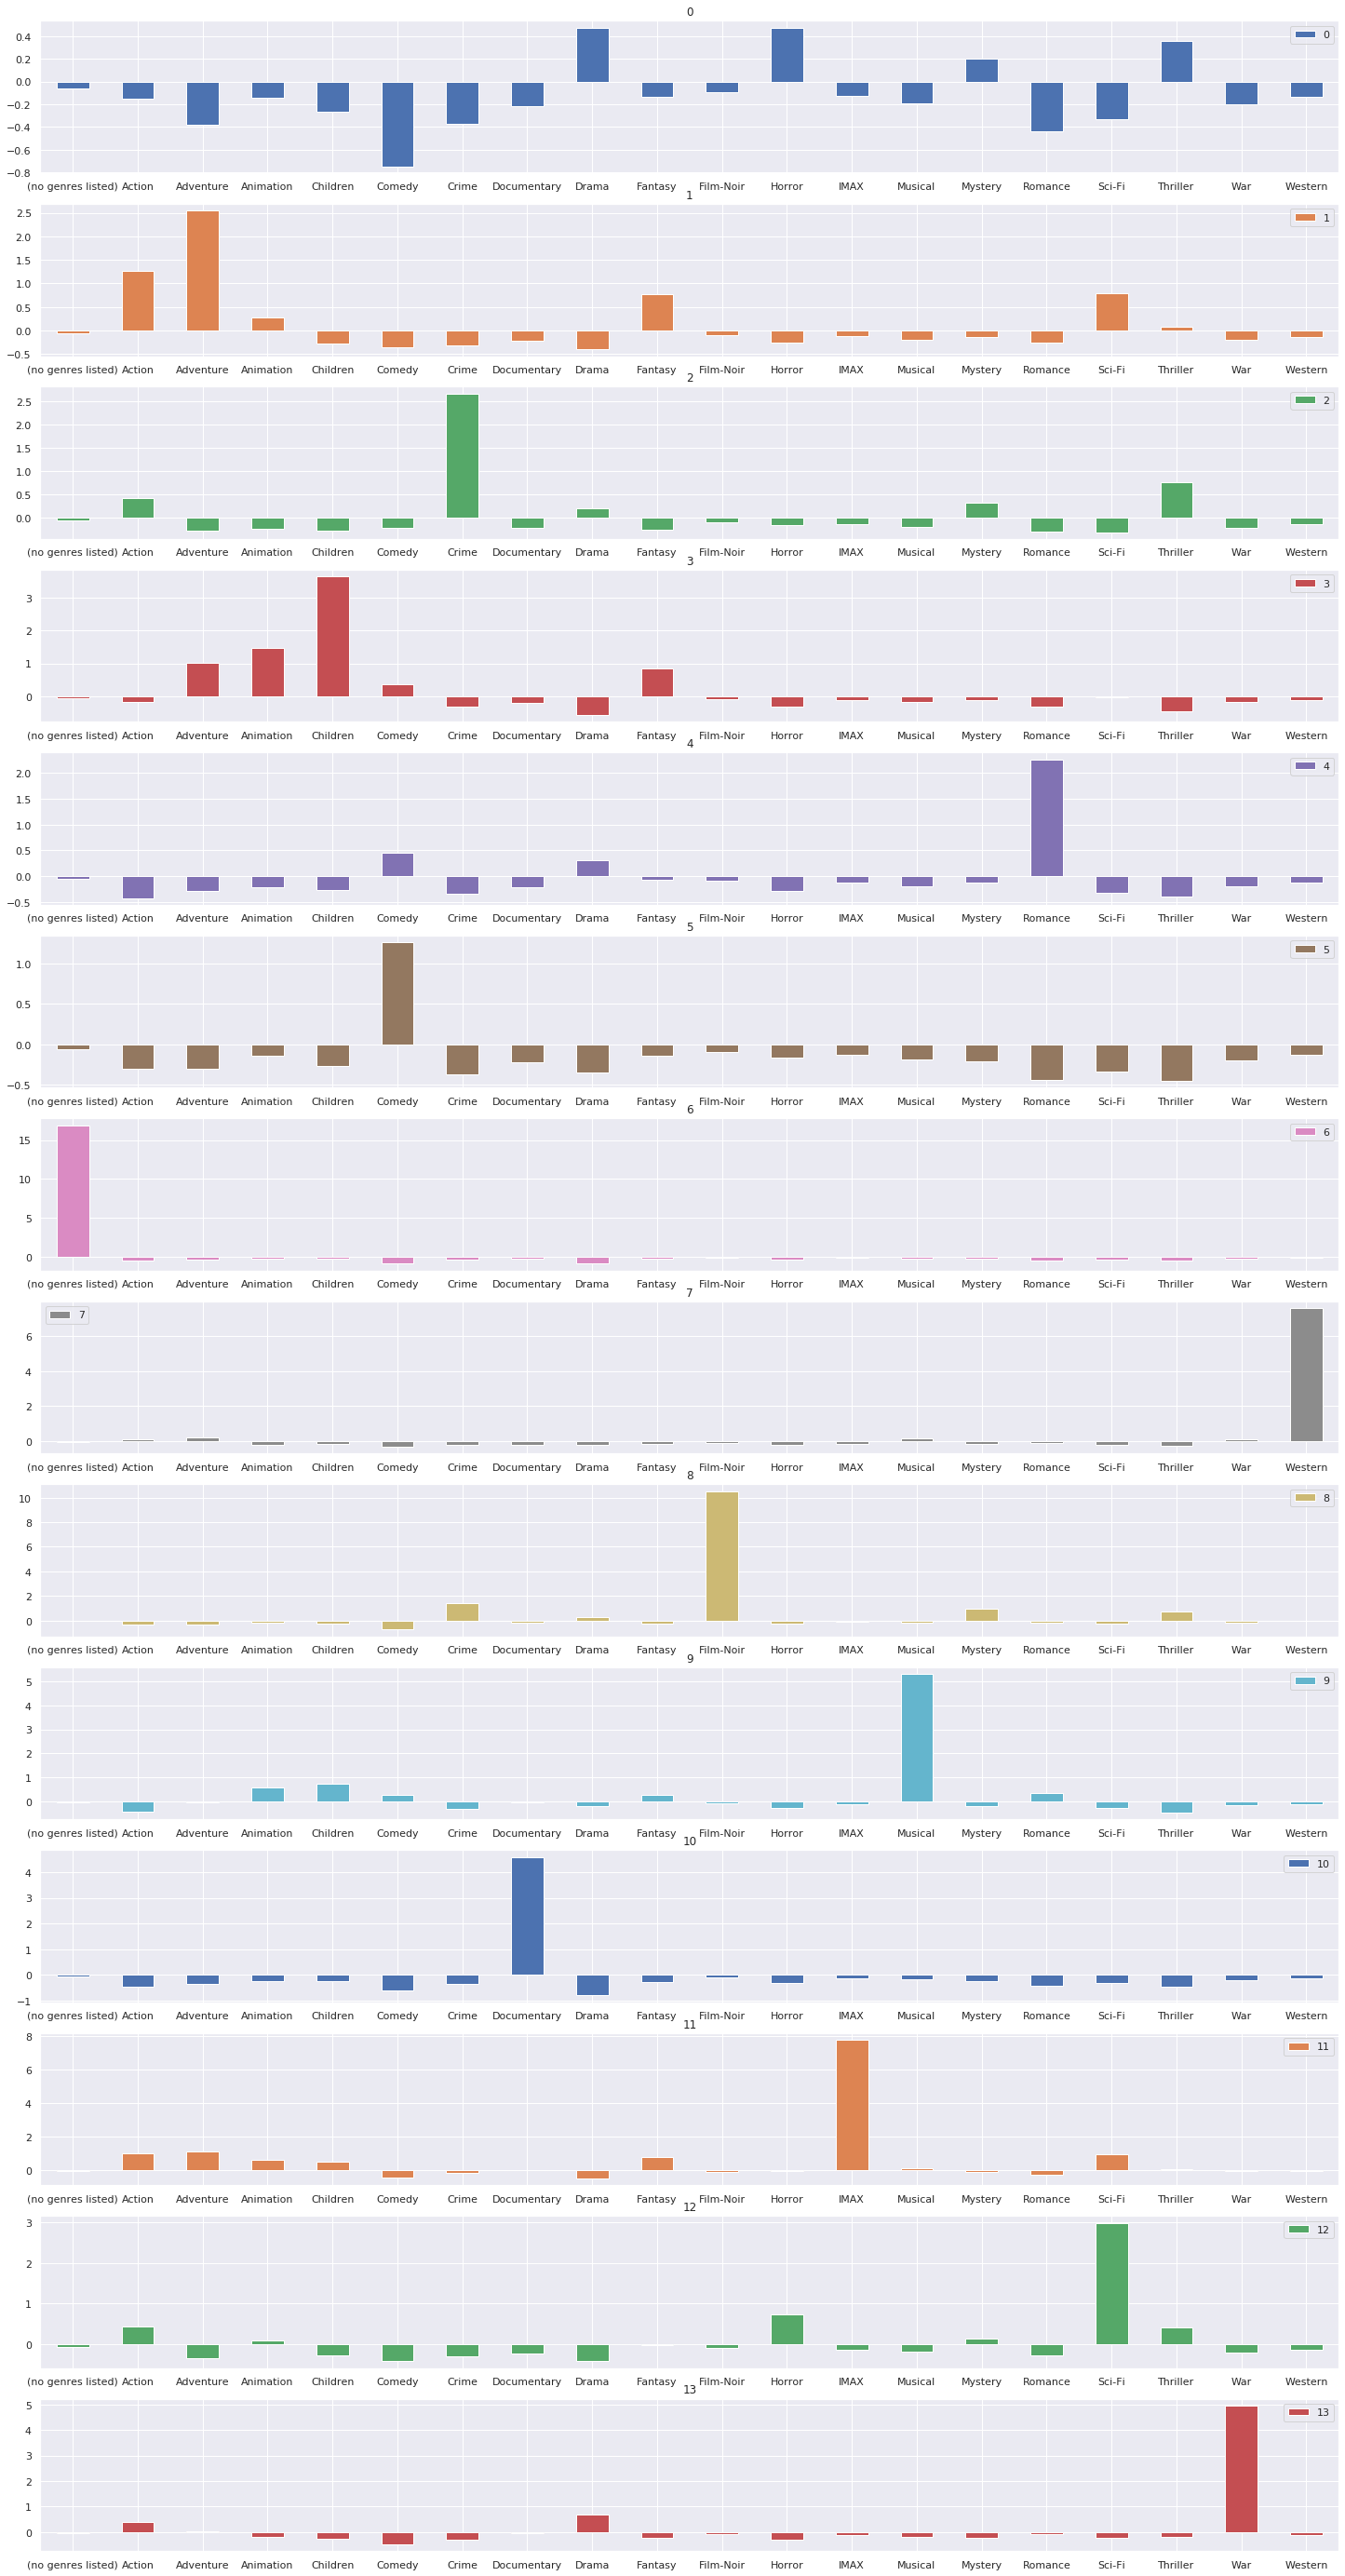

In [21]:
# Método do cotovelo, achamos o ponto de quebra, numero recomendado para ser o numero de clusters
modelo = KMeans(n_clusters=14)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.transpose().plot.bar(subplots=True, 
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [23]:
grupo = 8
filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5137,8236,While the City Sleeps (1956),Drama|Film-Noir,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
913,1212,"Third Man, The (1949)",Film-Noir|Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
959,1260,M (1931),Crime|Film-Noir|Thriller,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
711,930,Notorious (1946),Film-Noir|Romance|Thriller,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
7062,69516,"Limits of Control, The (2009)",Crime|Drama|Film-Noir,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
2048,2727,Killer's Kiss (1955),Crime|Film-Noir,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
951,1252,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
760,999,2 Days in the Valley (1996),Crime|Film-Noir,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
305,347,Bitter Moon (1992),Drama|Film-Noir|Romance,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4839,7223,D.O.A. (1950),Drama|Film-Noir|Mystery,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0


In [24]:
# Agrupamento Hierárquico
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters=14)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5,  0, 13, ...,  2,  5,  2])

In [25]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 37.58231  ,  52.601227 ],
       [ 19.643826 ,  65.73558  ],
       [ 17.429377 ,  39.966995 ],
       ...,
       [ 11.174375 ,   7.8967733],
       [ 37.181675 ,  -3.3193555],
       [-20.344595 , -16.503305 ]], dtype=float32)

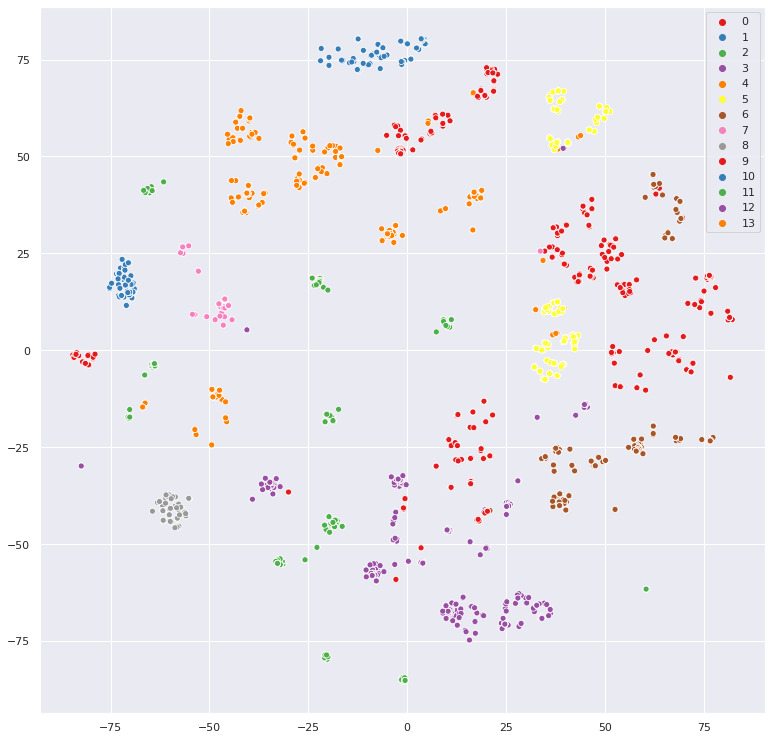

In [26]:
sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=modelo.labels_, palette=sns.color_palette('Set1', 14))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c4c2eb400>,
      dtype=object)

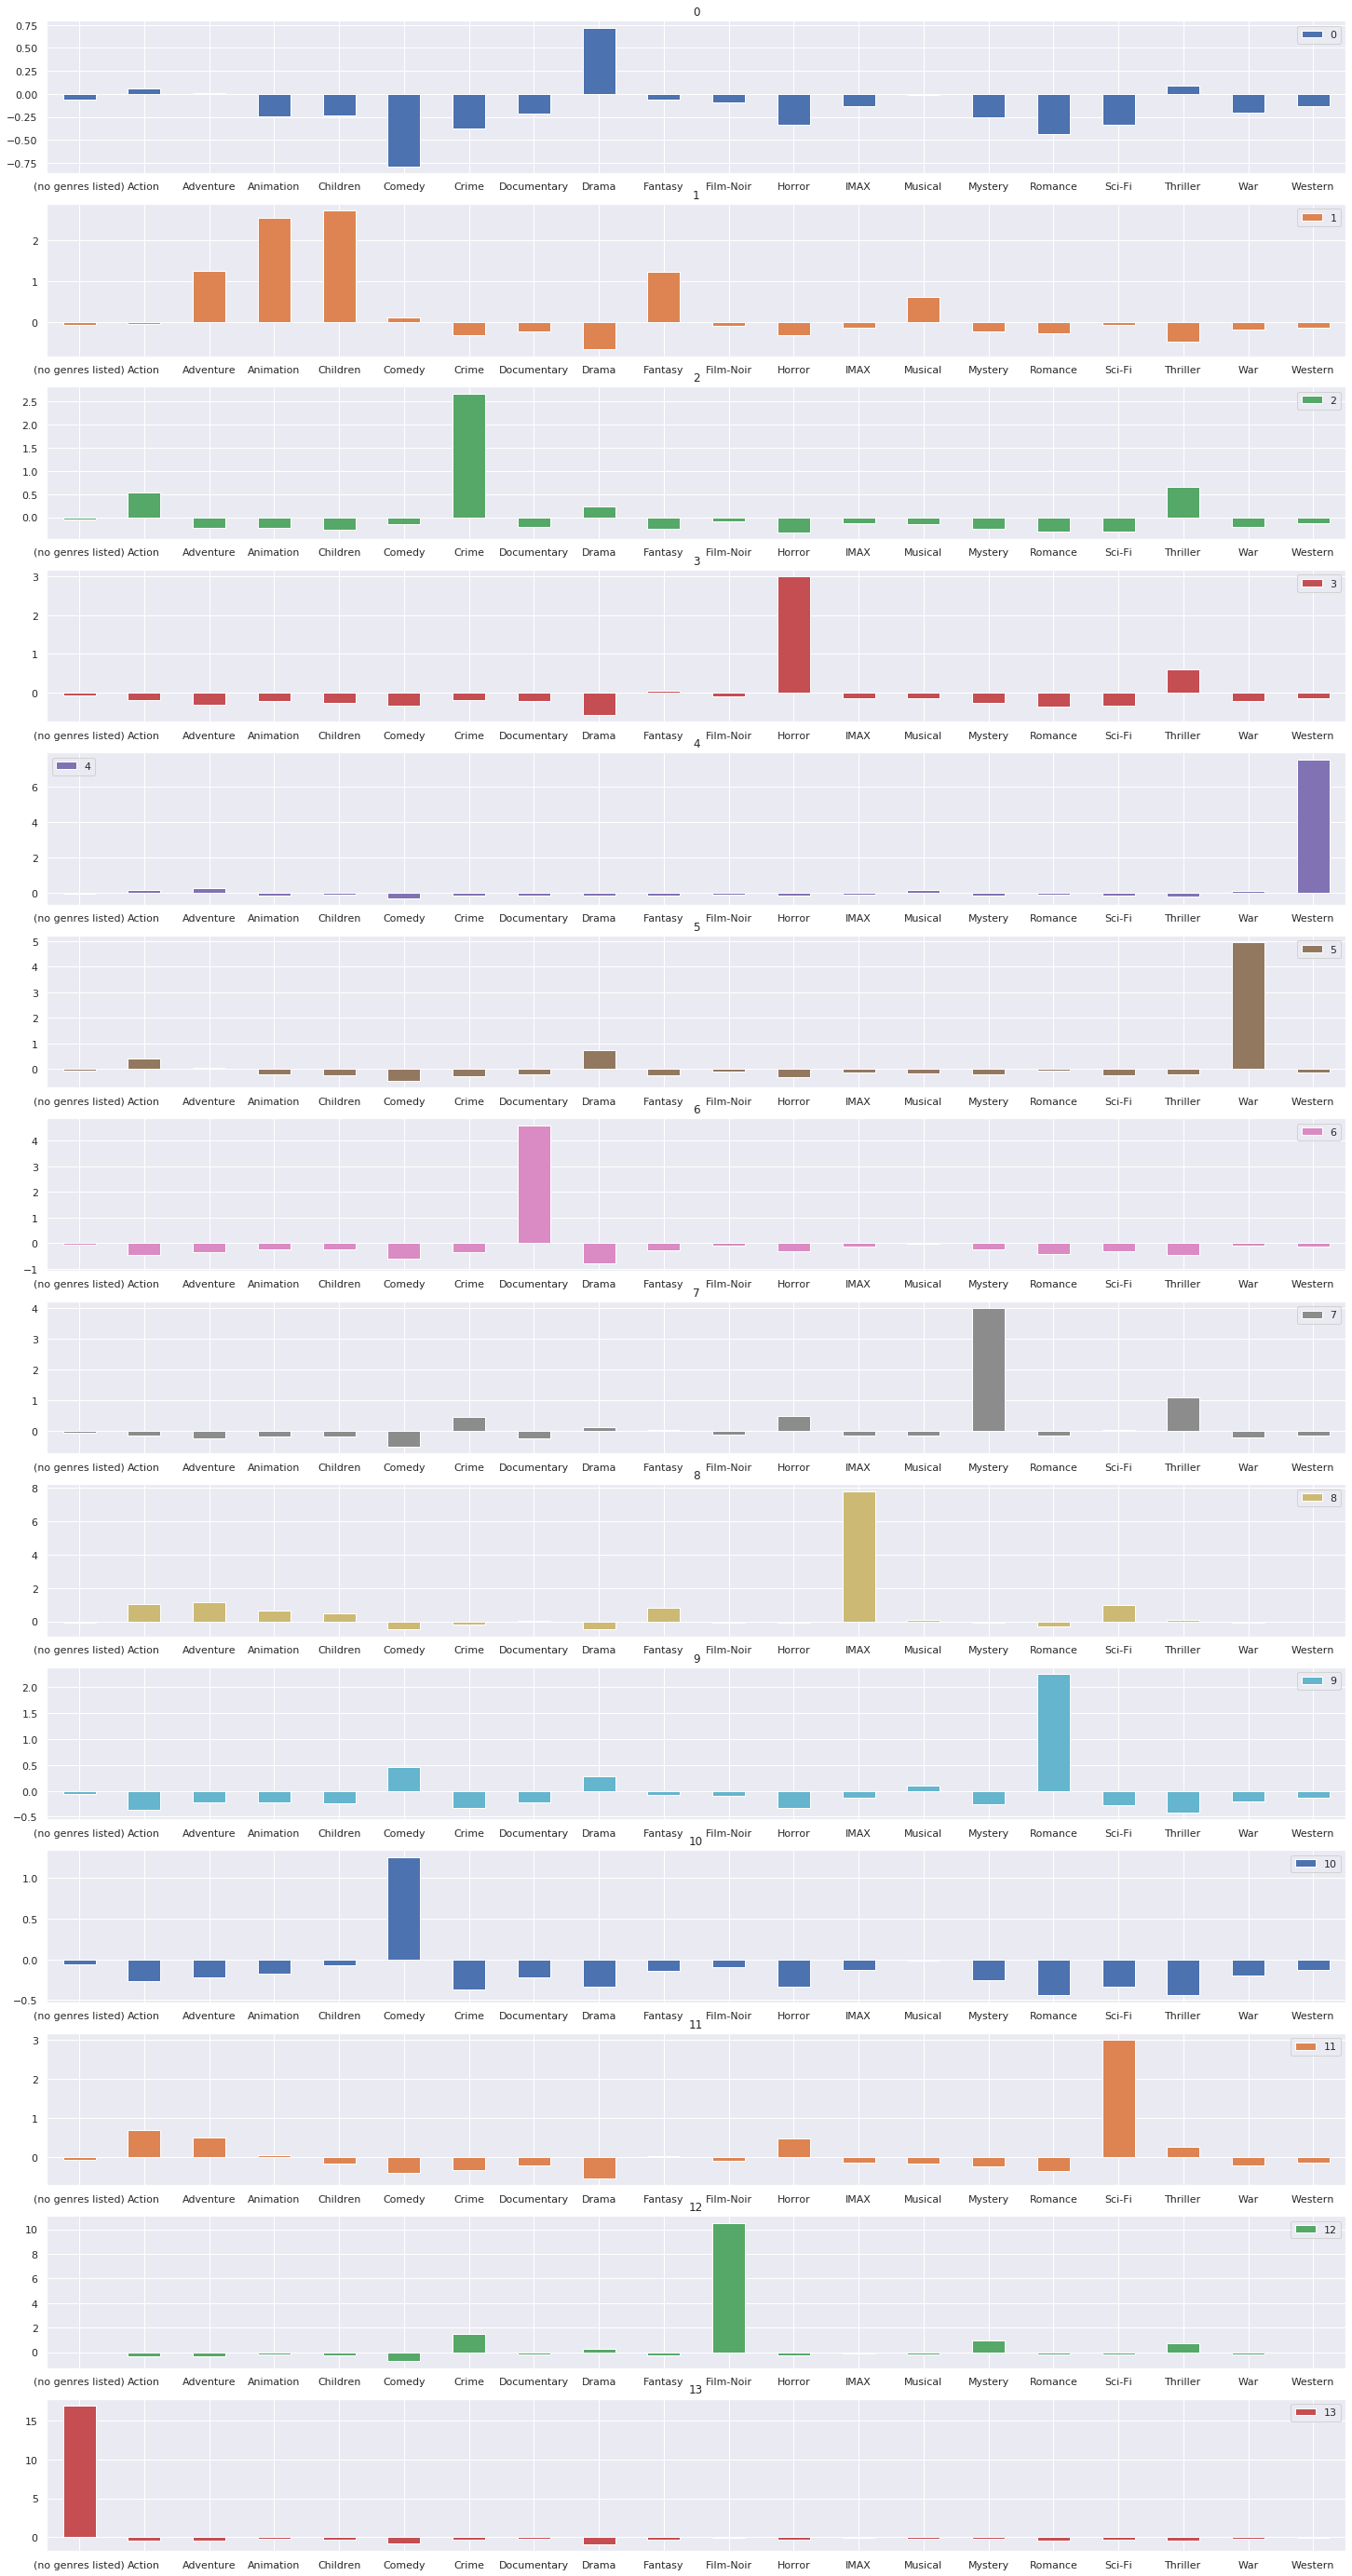

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
modelo = KMeans(n_clusters=14)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.transpose().plot.bar(subplots=True, 
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [28]:
#Comando para obter o dendograma
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 0.        , 10.        ,  2.40388223,  2.        ],
       [ 9.        , 14.        ,  2.89699321,  3.        ],
       [ 2.        , 15.        ,  3.25230676,  4.        ],
       [ 3.        , 16.        ,  3.66851018,  5.        ],
       [11.        , 17.        ,  3.77509141,  6.        ],
       [ 1.        , 18.        ,  4.61073242,  7.        ],
       [ 7.        , 19.        ,  4.61700165,  8.        ],
       [ 6.        , 20.        ,  5.13160002,  9.        ],
       [ 5.        , 21.        ,  5.20319606, 10.        ],
       [ 4.        , 22.        ,  7.80515678, 11.        ],
       [ 8.        , 23.        ,  8.31648379, 12.        ],
       [12.        , 24.        , 10.81668285, 13.        ],
       [13.        , 25.        , 17.05931547, 14.        ]])

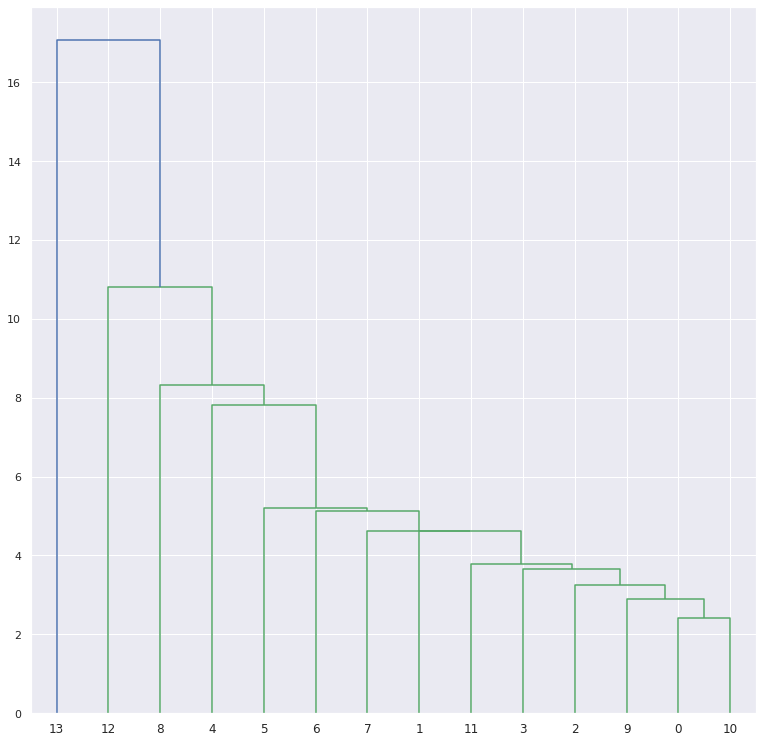

In [29]:
# Quais filmes estão próximos de quais? Basta analisar o dendograma
dendograma = dendrogram(matriz_de_distancia)